In [1]:
import numpy as np              # For numerical operations and arrays
import pandas as pd             # For working with tabular data
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.datasets import fetch_california_housing   # Real world regression dataset
from sklearn.model_selection import train_test_split    # Train test split utility
from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

In [2]:
california = fetch_california_housing(as_frame=True)

df = california.frame.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [5]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

X.head()
X.shape

(20640, 8)

In [6]:
corr_matrix = df[['MedInc',  'HouseAge',  'AveRooms',  'AveBedrms'  ,'Population'  ,'AveOccup','Latitude',  'Longitude' , ]+['MedHouseVal']].corr()
print('Correlation Matrix: ')
print(corr_matrix)

Correlation Matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBed

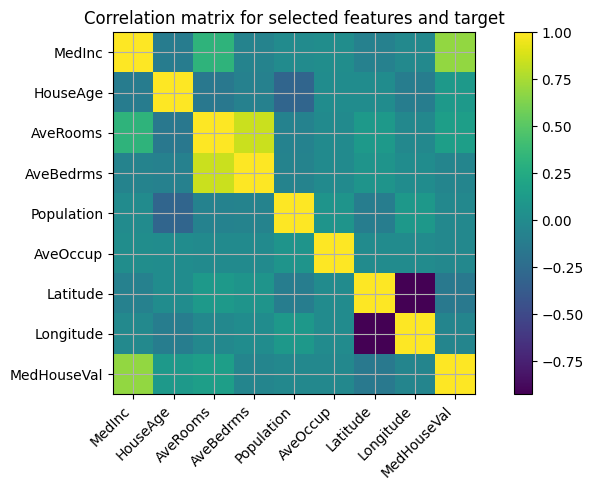

In [7]:
fig, ax = plt.subplots()

cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation = 45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()

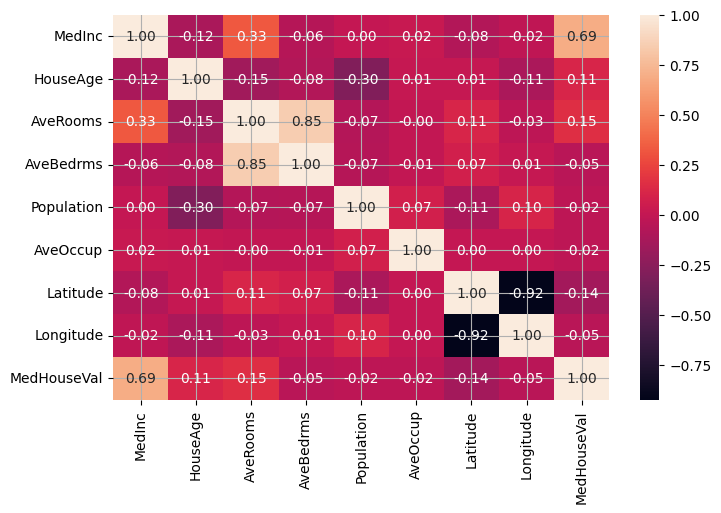

In [8]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True,fmt='.2f')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.25,
    random_state=42
)

print(X_test.shape)
print(y_train.shape)

(5160, 8)
(15480,)


In [10]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


LinearRegression()

In [11]:
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
print('Intercept: ',lin_reg.intercept_)
print('\n Coefficience: ',lin_reg.coef_)
for col, cof in zip(feature_cols, lin_reg.coef_):
    print(f'{col} : {cof}')

Intercept:  -37.02782758526939

 Coefficience:  [ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]
MedInc : 0.44760006851694667
HouseAge : 0.009567525956131027
AveRooms : -0.12475595615841127
AveBedrms : 0.794471253983541
Population : -1.4390259614450332e-06
AveOccup : -0.0034430799260361236


In [12]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [13]:
def regression_matrics(y_true, y_pred, label='Model'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)


    print(f'=== {label} ====')
    print('MAE: ', mae)
    print('RMSE: ', rmse)
    print('R2 : ', r2)
    print()

regression_matrics(y_train, y_train_pred, label='Linear Regression(Train)')
regression_matrics(y_test, y_test_pred, label='Linear Regression(test)')


=== Linear Regression(Train) ====
MAE:  0.5295154304301851
RMSE:  0.7214930466501481
R2 :  0.609873031052925

=== Linear Regression(test) ====
MAE:  0.5296964012919455
RMSE:  0.7356145375446769
R2 :  0.5910509795491352



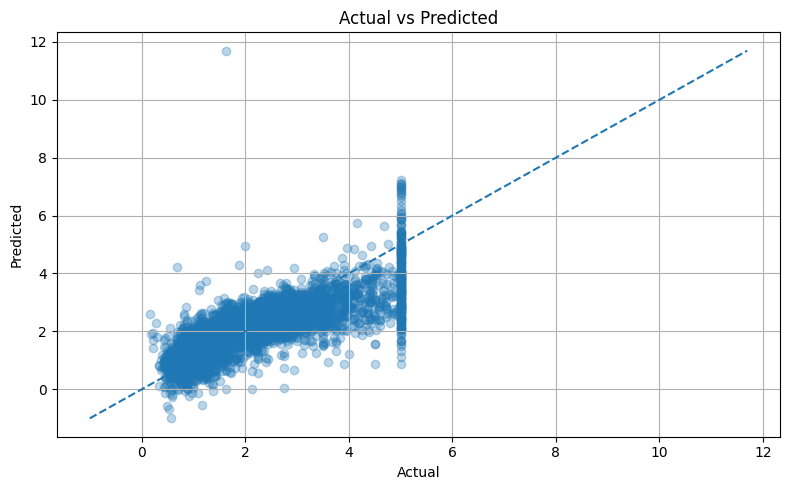

In [14]:
plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(),y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()

## Polynomial Regression 

In [16]:
target_col = 'MedHouseVal'
X_single = df[['MedInc']]  # DataFrame with one column
y_single = df[target_col]

X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

print('Single feature training shape:', X_single_train.shape)
print('Single feature test shape    :', X_single_test.shape)

Single feature training shape: (16512, 1)
Single feature test shape    : (4128, 1)


In [18]:
degrees = [1,2,3,5]
result = []

for deg in degrees:
    model = Pipeline([
        ('Poly', PolynomialFeatures(degree=deg, include_bias=False)),
        ('lin_reg', LinearRegression())
    ])

    model.fit(X_single_train, y_single_train)

    y_train_pred = model.predict(X_single_train)
    y_test_pred = model.predict(X_single_test)

    mae_train = mean_absolute_error(y_single_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_single_train, y_train_pred))
    r2_train = r2_score(y_single_train, y_train_pred)

    mae_test = mean_absolute_error(y_single_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_single_test, y_test_pred))
    r2_test = r2_score(y_single_test, y_test_pred)

    result.append({
        'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_test,
    })

result_df = pd.DataFrame(result)
result_df



,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,0.624951,0.836149,0.476993,0.629909,0.842090,0.458859
1,2,0.624049,0.832459,0.481598,0.628292,0.838614,0.463318
2,3,0.615010,0.825033,0.490806,0.621896,0.835641,0.467116
3,5,0.614411,0.824844,0.491039,0.621369,0.835892,0.466796


In [24]:
# all features 
X_all = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']


X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=.2, random_state=42)

degrees = 2

poly_all_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degrees, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_all_model.fit(X_all_train, y_all_train)

y_all_test_pred = poly_all_model.predict(X_all_test)

regression_matrics(y_all_test, y_all_test_pred, label= '')

===  ====
MAE:  0.4670009333851687
RMSE:  0.6813967455567821
R2 :  0.6456819721437999

